## Required Imports

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

from tensorflow.keras.layers import Conv2D, MaxPooling2D


2022-08-25 10:37:07.394382: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-25 10:37:07.394421: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Gathering Dataset

In [2]:
mnist = tf.keras.datasets.mnist

# getting dataset in x and y parameters because it returns 2 values
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizing the dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)

Shape of x_train:  (60000, 28, 28)
Shape of x_test:  (10000, 28, 28)


## Instantiate or Build the Model

In [3]:
# model = tf.keras.models.Sequential()

# # Flatten will convert 2d data into 1d data
# model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

# # An activation function is the function in an artificial neuron that delivers an output based on inputs.
# # we use ReLU in hidden layer to avoid vanishing gradient problem and better computation performance
# # Dense: helps in forward propagation
# model.add(tf.keras.layers.Dense(128, activation = 'relu'))

# model.add(tf.keras.layers.Dense(32))

# # Our model will randomly remove 20% of nodes or neurons or Perceptrons in an iteration
# model.add(tf.keras.layers.Dropout(0.2))

# # When we have more then one classification function we use softmax, most of the time
# model.add(tf.keras.layers.Dense(10, activation = 'softmax'))    

## Building Baisc Neural Network  

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(298, activation = 'relu'), 
    tf.keras.layers.Dense(128, activation = 'relu'), 
    tf.keras.layers.Dense(32, activation = 'relu'), 
    tf.keras.layers.Dense(10, activation = 'softmax')
])

2022-08-25 10:37:09.934137: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-25 10:37:09.934167: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-25 10:37:09.934183: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (user-H410M-H-V3): /proc/driver/nvidia/version does not exist
2022-08-25 10:37:09.934429: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 298)               233930    
                                                                 
 dense_1 (Dense)             (None, 128)               38272     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 276,660
Trainable params: 276,660
Non-trainable params: 0
_________________________________________________________________


## Compile & Train the model

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
r = model.fit(
    x_train, 
    y_train, 
    epochs=5,
    validation_data=(x_test, y_test), 
    validation_split = 0.2
)

2022-08-25 10:37:10.111903: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1864/1875 [============================>.] - ETA: 0s - loss: 0.2156 - accuracy: 0.9349

2022-08-25 10:37:14.507081: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 [==============================] - 5s 2ms/step - loss: 0.2151 - accuracy: 0.9350 - val_loss: 0.1739 - val_accuracy: 0.9456
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0911 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9733
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0619 - accuracy: 0.9802 - val_loss: 0.0801 - val_accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0498 - accuracy: 0.9836 - val_loss: 0.0879 - val_accuracy: 0.9746
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0398 - accuracy: 0.9871 - val_loss: 0.0766 - val_accuracy: 0.9786


In [8]:
y_prob = model.predict(x_test)

119/313 [==========>...................] - ETA: 0s

2022-08-25 10:37:30.502686: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 0s 901us/step


In [9]:
y_pred = y_prob.argmax(axis = 1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9786

## Confusion Matrix

153/313 [=============>................] - ETA: 0s

2022-08-25 10:37:30.968922: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 0s 924us/step
Confusion matrix without normalization
[[ 967    0    3    1    0    2    4    1    2    0]
 [   0 1113    9    3    0    0    1    6    2    1]
 [   1    0 1018    1    1    0    3    7    1    0]
 [   0    0    7  995    0    0    0    2    2    4]
 [   0    0    4    0  962    0    4    2    0   10]
 [   2    0    0   26    2  852    3    1    2    4]
 [   1    2    1    1    3    4  942    0    4    0]
 [   0    0   10    0    1    0    0 1012    2    3]
 [   4    0    4    9    2    2    1    2  947    3]
 [   1    2    0    9   10    1    1    3    4  978]]


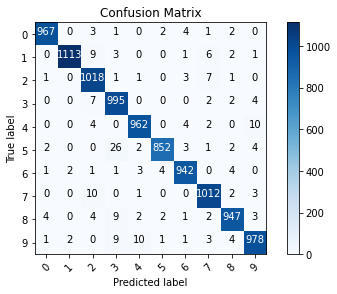

In [11]:
from sklearn.metrics import confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title="Confusion Matrix",
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalize can be applied by setting 'normalize = True'
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
  
    else:
        print("Confusion matrix without normalization")
  
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = 'center',
             color = "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

## Plotting few Places where the Model went wrong

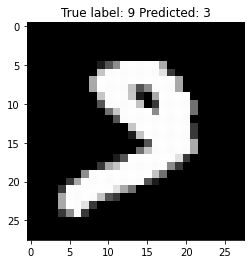

In [12]:
# misclassified_idx = np.where(p_test != y_test)[0]
# i = np.random.choice(misclassified_idx)

i = np.random.randint(0, 1000)

plt.imshow(x_test[i], cmap= 'gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));